<a href="https://colab.research.google.com/github/VisageDvachevsky/LabWork28092024/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openpyxl statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 14.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.sankey import Sankey

In [ ]:
data = pd.read_excel("https://github.com/VisageDvachevsky/LabWork28092024/raw/refs/heads/main/data.xlsx")

In [ ]:
print(data[data.isnull().any(axis=1)])

Empty DataFrame
Columns: [IP, time, request, status, size, ID, Unnamed: 6, Unnamed: 7]
Index: []


In [ ]:
columns = ['IP', 'time', 'request', 'status', 'size', 'ID', 'Unnamed: 6', 'Unnamed: 7']
chars = data[columns].apply(lambda x: x.str.slice(0, 5) if x.dtype == "object" else x)
print(chars)

           IP   time request  status  size     ID Unnamed: 6 Unnamed: 7
0       79.23  [1/Ju   POST      200  2005  ID507      [1/Ju      +04:0
1       203.2  [1/Ju   POST      200  3397  ID507      [1/Ju      +04:0
2       79.23  [1/Ju   POST      200  3547  ID507      [1/Ju      +04:0
3       79.23  [1/Ju   POST      200  3733  ID507      [1/Ju      +04:0
4       170.1  [1/Ju   POST      200  3357  ID507      [1/Ju      +04:0
...       ...    ...     ...     ...   ...    ...        ...        ...
232325  182.5  [30/J   GET /     200  2202  ID542      [30/J      +04:0
232326  17.13  [30/J   POST      200  2561  ID542      [30/J      +04:0
232327  182.5  [30/J   POST      200  2734  ID542      [30/J      +04:0
232328  29.14  [30/J   POST      200  4186  ID542      [30/J      +04:0
232329  201.1  [30/J   POST      200  2050  ID542      [30/J      +04:0

[232330 rows x 8 columns]


In [ ]:
data.drop(columns=['Unnamed: 6', 'Unnamed: 7'], inplace=True)


In [ ]:
print(data.info)

<bound method DataFrame.info of                      IP                      time  \
0        79.239.214.126 2015-06-01 00:00:07+04:00   
1       203.205.145.253 2015-06-01 00:00:24+04:00   
2        79.239.214.126 2015-06-01 00:00:31+04:00   
3        79.239.214.126 2015-06-01 00:00:34+04:00   
4        170.107.231.22 2015-06-01 00:02:54+04:00   
...                 ...                       ...   
232325     182.50.44.71 2015-06-30 23:59:36+04:00   
232326   17.134.175.104 2015-06-30 23:59:43+04:00   
232327     182.50.44.71 2015-06-30 23:59:47+04:00   
232328   29.141.180.191 2015-06-30 23:59:48+04:00   
232329    201.174.171.2 2015-06-30 23:59:52+04:00   

                                         request  status  size       ID  \
0                   POST /catalog.phtml HTTP 1.1     200  2005   ID5075   
1                    POST /search.phtml HTTP 1.1     200  3397   ID5076   
2                   POST /catalog.phtml HTTP 1.1     200  3547   ID5075   
3                    POST /sear

In [ ]:
print(data.head)

<bound method NDFrame.head of                      IP                           time  \
0        79.239.214.126   [1/Jun/2015:00:00:07 +04:00]   
1       203.205.145.253   [1/Jun/2015:00:00:24 +04:00]   
2        79.239.214.126   [1/Jun/2015:00:00:31 +04:00]   
3        79.239.214.126   [1/Jun/2015:00:00:34 +04:00]   
4        170.107.231.22   [1/Jun/2015:00:02:54 +04:00]   
...                 ...                            ...   
232325     182.50.44.71  [30/Jun/2015:23:59:36 +04:00]   
232326   17.134.175.104  [30/Jun/2015:23:59:43 +04:00]   
232327     182.50.44.71  [30/Jun/2015:23:59:47 +04:00]   
232328   29.141.180.191  [30/Jun/2015:23:59:48 +04:00]   
232329    201.174.171.2  [30/Jun/2015:23:59:52 +04:00]   

                                         request  status  size       ID  
0                   POST /catalog.phtml HTTP 1.1     200  2005   ID5075  
1                    POST /search.phtml HTTP 1.1     200  3397   ID5076  
2                   POST /catalog.phtml HTTP 1.1   

In [ ]:
print(data.describe(include='all'))

                    IP                          time  \
count           232330                        232330   
unique           49239                        232330   
top     228.189.137.89  [1/Jun/2015:00:00:07 +04:00]   
freq                40                             1   
mean               NaN                           NaN   
std                NaN                           NaN   
min                NaN                           NaN   
25%                NaN                           NaN   
50%                NaN                           NaN   
75%                NaN                           NaN   
max                NaN                           NaN   

                             request    status           size       ID  
count                         232330  232330.0  232330.000000   232330  
unique                           102       NaN            NaN    49239  
top     POST /catalog.phtml HTTP 1.1       NaN            NaN  ID39208  
freq                          10684

In [ ]:
data['time'] = pd.to_datetime(data['time'].str.extract(r'\[([^\]]+)\]')[0], format='%d/%b/%Y:%H:%M:%S %z')

In [ ]:
data['date'] = data['time'].dt.date
data['hour'] = data['time'].dt.hour

In [ ]:
print(data.isna().sum())

IP         0
time       0
request    0
status     0
size       0
ID         0
date       0
hour       0
dtype: int64


In [ ]:
print(data.describe)

<bound method NDFrame.describe of                      IP                      time  \
0        79.239.214.126 2015-06-01 00:00:07+04:00   
1       203.205.145.253 2015-06-01 00:00:24+04:00   
2        79.239.214.126 2015-06-01 00:00:31+04:00   
3        79.239.214.126 2015-06-01 00:00:34+04:00   
4        170.107.231.22 2015-06-01 00:02:54+04:00   
...                 ...                       ...   
232325     182.50.44.71 2015-06-30 23:59:36+04:00   
232326   17.134.175.104 2015-06-30 23:59:43+04:00   
232327     182.50.44.71 2015-06-30 23:59:47+04:00   
232328   29.141.180.191 2015-06-30 23:59:48+04:00   
232329    201.174.171.2 2015-06-30 23:59:52+04:00   

                                         request  status  size       ID  \
0                   POST /catalog.phtml HTTP 1.1     200  2005   ID5075   
1                    POST /search.phtml HTTP 1.1     200  3397   ID5076   
2                   POST /catalog.phtml HTTP 1.1     200  3547   ID5075   
3                    POST /se

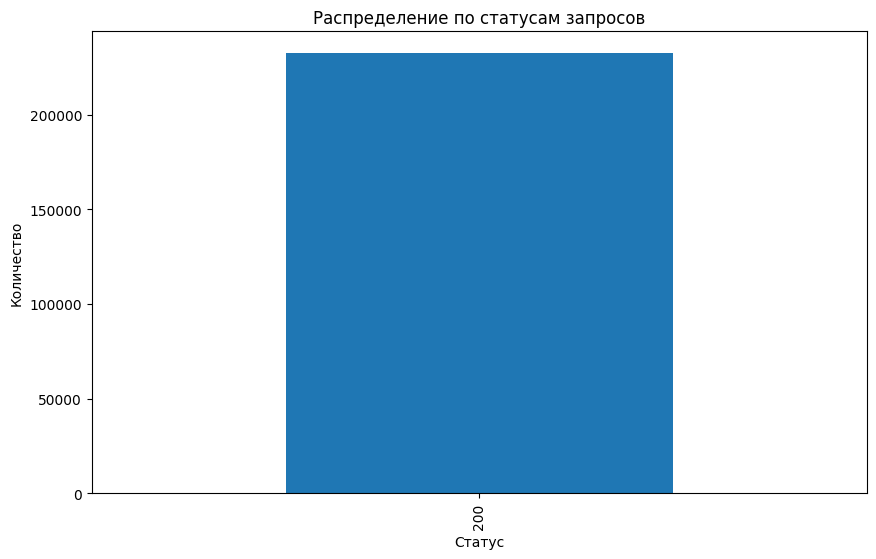

In [ ]:
status_counts = data['status'].value_counts()
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar')
plt.title('Распределение по статусам запросов')
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.show()

In [ ]:
print(status_counts.describe())

count         1.0
mean     232330.0
std           NaN
min      232330.0
25%      232330.0
50%      232330.0
75%      232330.0
max      232330.0
Name: count, dtype: float64


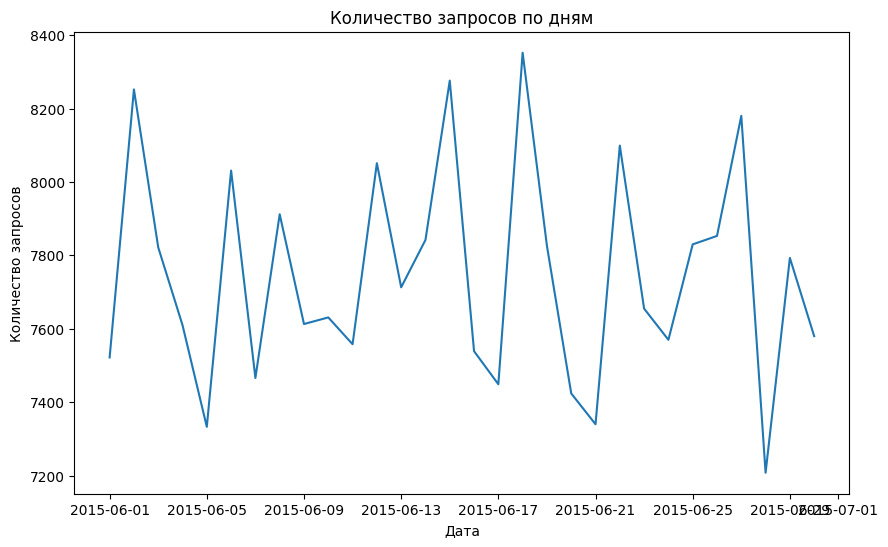

In [ ]:
requests_per_day = data['date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
requests_per_day.plot(kind='line')
plt.title('Количество запросов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество запросов')
plt.show()

In [ ]:
print(requests_per_day.describe())

count      30.000000
mean     7744.333333
std       299.527713
min      7208.000000
25%      7543.750000
50%      7684.000000
75%      7897.250000
max      8352.000000
Name: count, dtype: float64


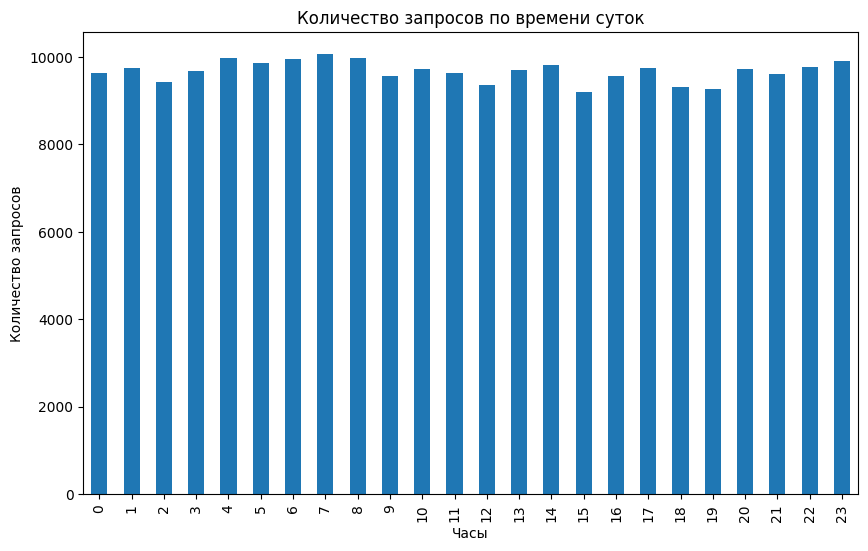

In [ ]:
requests_per_hour = data.groupby('hour').size()
plt.figure(figsize=(10, 6))
requests_per_hour.plot(kind='bar')
plt.title('Количество запросов по времени суток')
plt.xlabel('Часы')
plt.ylabel('Количество запросов')
plt.show()

In [ ]:
print(requests_per_hour.describe())

count       24.000000
mean      9680.416667
std        233.929182
min       9208.000000
25%       9564.500000
50%       9716.000000
75%       9829.500000
max      10071.000000
dtype: float64


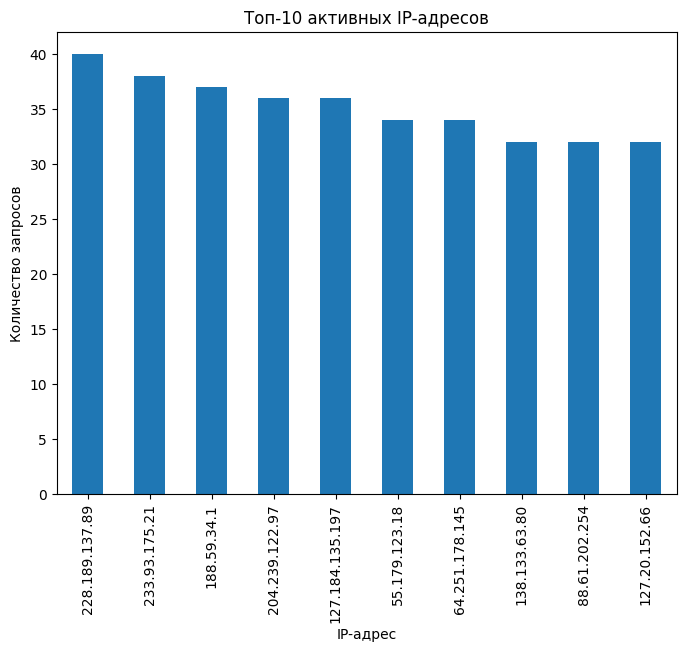

In [ ]:
top_ips = data['IP'].value_counts().head(10)
plt.figure(figsize=(8, 6))
top_ips.plot(kind='bar')
plt.title('Топ-10 активных IP-адресов')
plt.xlabel('IP-адрес')
plt.ylabel('Количество запросов')
plt.show()

In [ ]:
print(top_ips.describe())

count    100.000000
mean      27.210000
std        3.367387
min       24.000000
25%       25.000000
50%       26.000000
75%       29.000000
max       40.000000
Name: count, dtype: float64


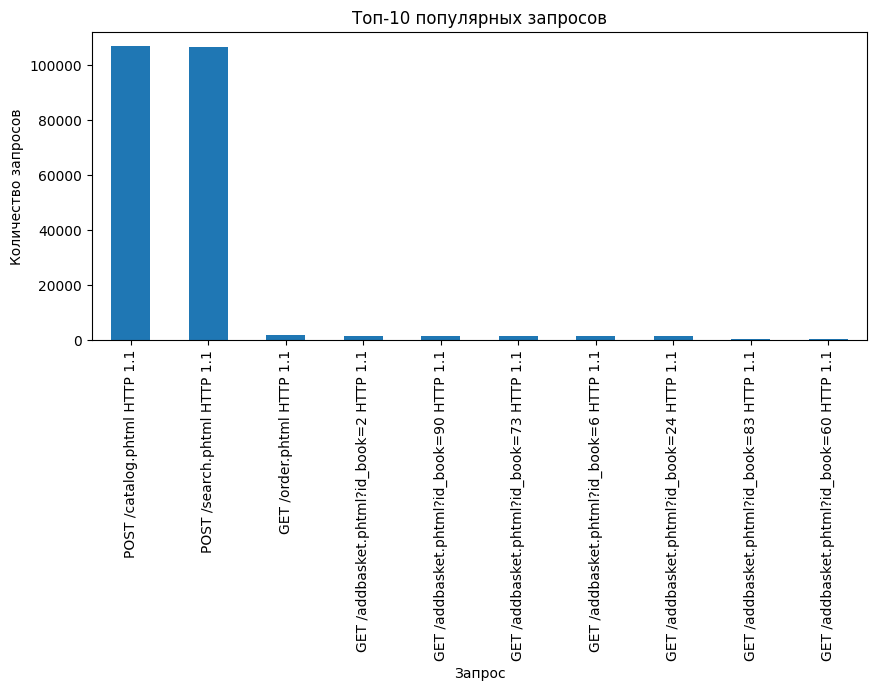

In [ ]:
top_requests = data['request'].value_counts().head(10)
plt.figure(figsize=(10, 4))
top_requests.plot(kind='bar')
plt.title('Топ-10 популярных запросов')
plt.xlabel('Запрос')
plt.ylabel('Количество запросов')
plt.show()

In [ ]:
print(top_requests.describe())

count        10.00000
mean      22202.30000
std       44588.02629
min         302.00000
25%        1179.75000
50%        1214.00000
75%        1638.50000
max      106848.00000
Name: count, dtype: float64


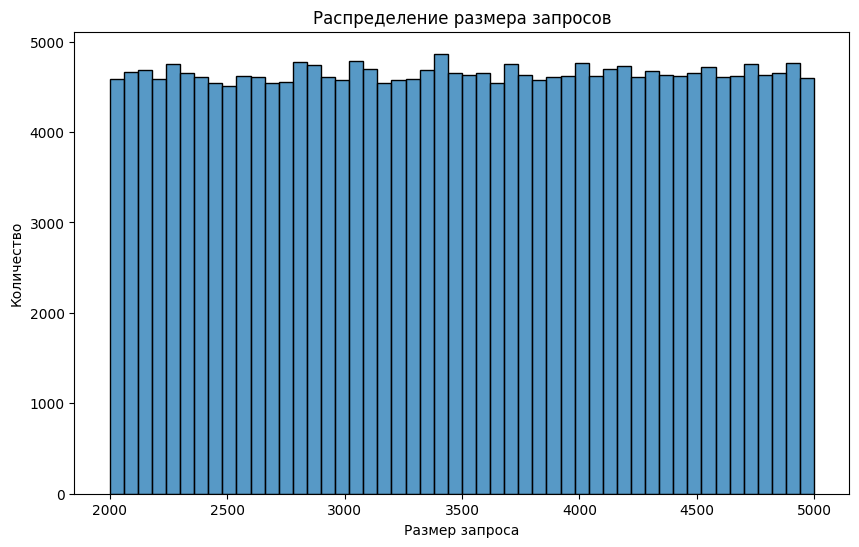

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['size'], bins=50, kde=False)
plt.title('Распределение размера запросов')
plt.xlabel('Размер запроса')
plt.ylabel('Количество')
plt.show()

In [ ]:
print(data['size'].describe())

count    232330.000000
mean       3501.946998
std         865.759110
min        2000.000000
25%        2756.000000
50%        3502.000000
75%        4251.000000
max        4999.000000
Name: size, dtype: float64


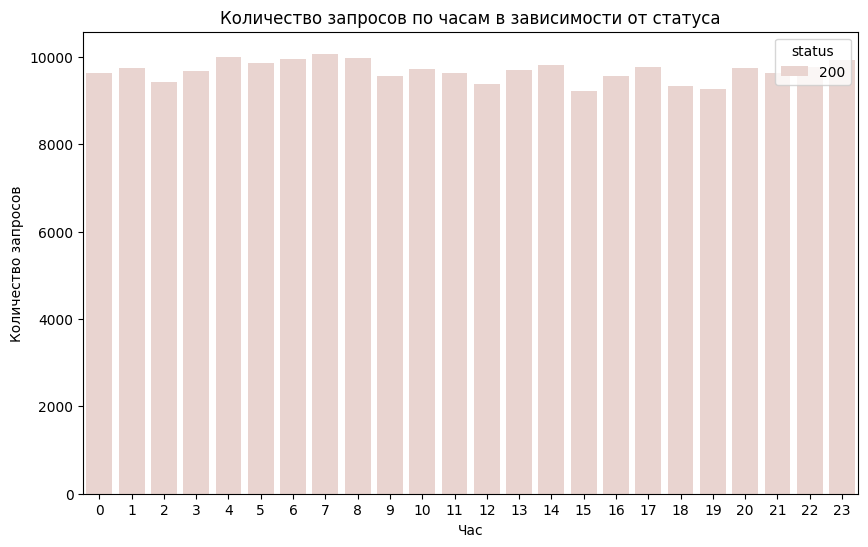

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='status', data=data)
plt.title('Количество запросов по часам в зависимости от статуса')
plt.xlabel('Час')
plt.ylabel('Количество запросов')
plt.show()

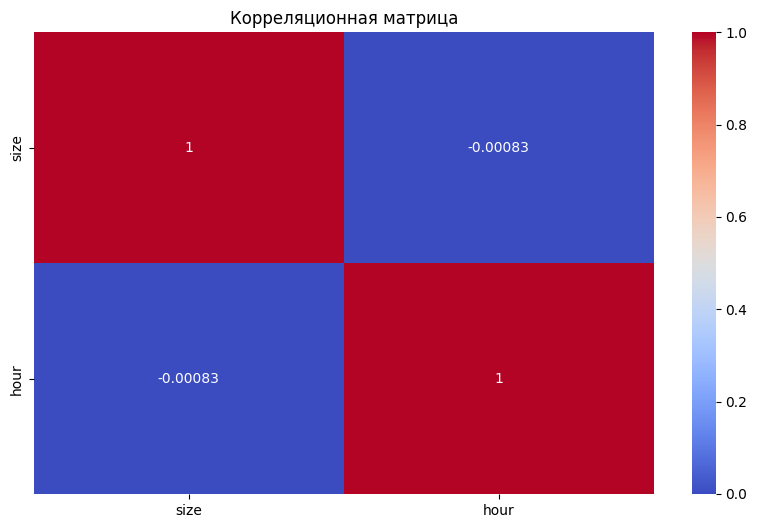

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = data[['size', 'hour']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


In [ ]:
print(corr_matrix)

          size      hour
size  1.000000 -0.000835
hour -0.000835  1.000000


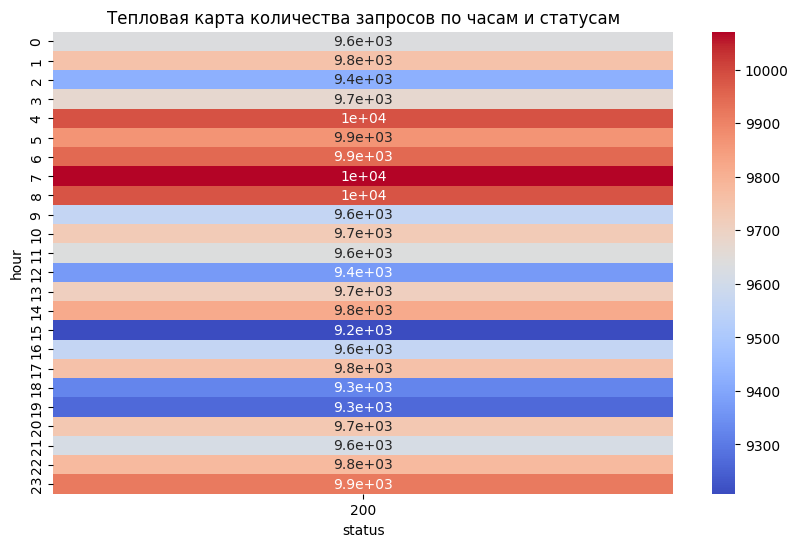

In [ ]:
heatmap_data = data.pivot_table(index='hour', columns='status', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Тепловая карта количества запросов по часам и статусам')
plt.show()

In [ ]:
print(heatmap_data.describe())

status           200
count      24.000000
mean     9680.416667
std       233.929182
min      9208.000000
25%      9564.500000
50%      9716.000000
75%      9829.500000
max     10071.000000


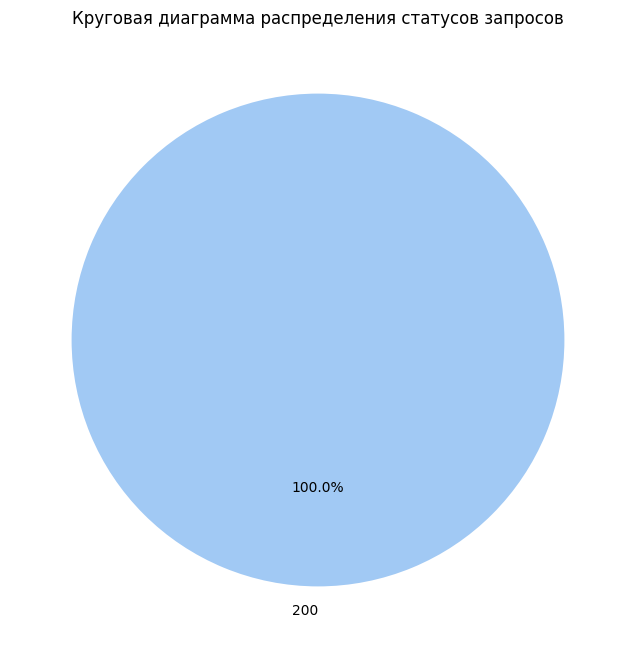

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Круговая диаграмма распределения статусов запросов')
plt.show()

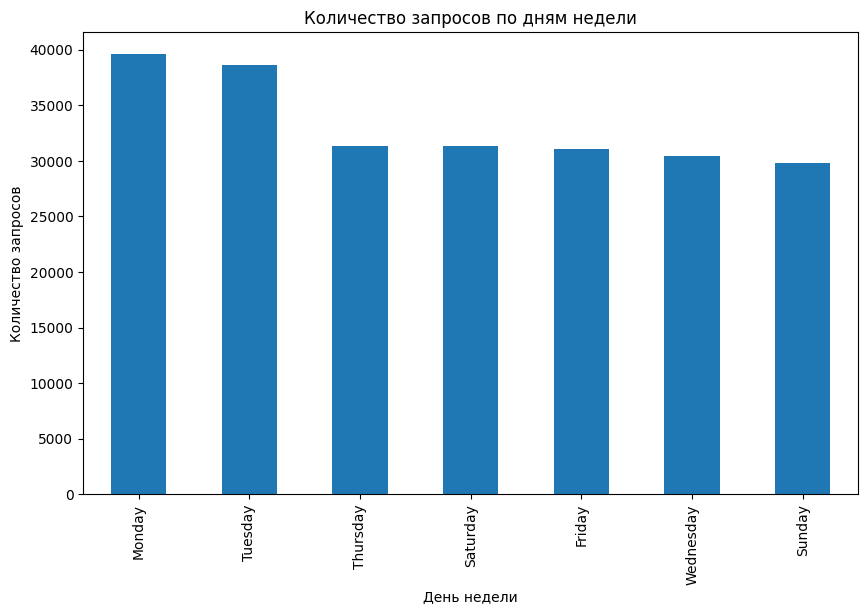

In [ ]:
data['weekday'] = data['time'].dt.day_name()
weekday_counts = data['weekday'].value_counts()
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar')
plt.title('Количество запросов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество запросов')
plt.show()


In [ ]:
print(weekday_counts.describe())

count        7.000000
mean     33190.000000
std       4094.938298
min      29856.000000
25%      30767.500000
50%      31348.000000
75%      34994.500000
max      39602.000000
Name: count, dtype: float64


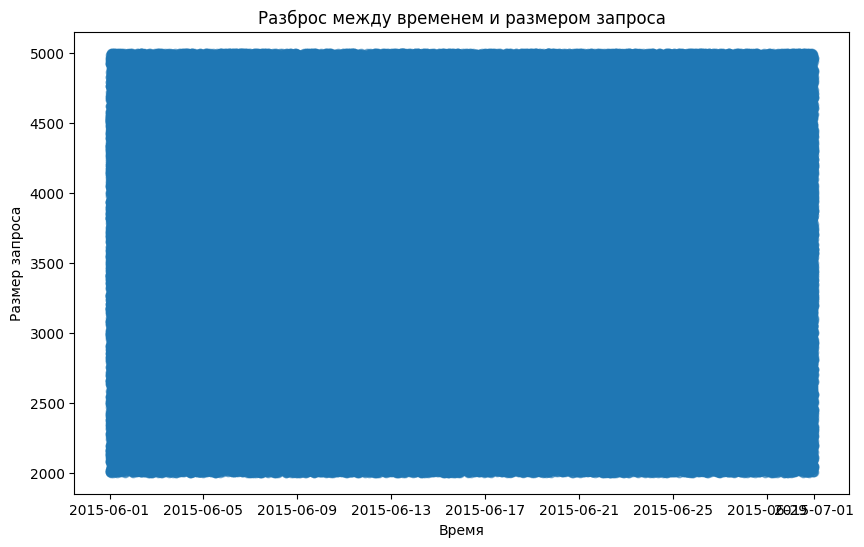

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['time'], data['size'], alpha=0.5)
plt.title('Разброс между временем и размером запроса')
plt.xlabel('Время')
plt.ylabel('Размер запроса')
plt.show()


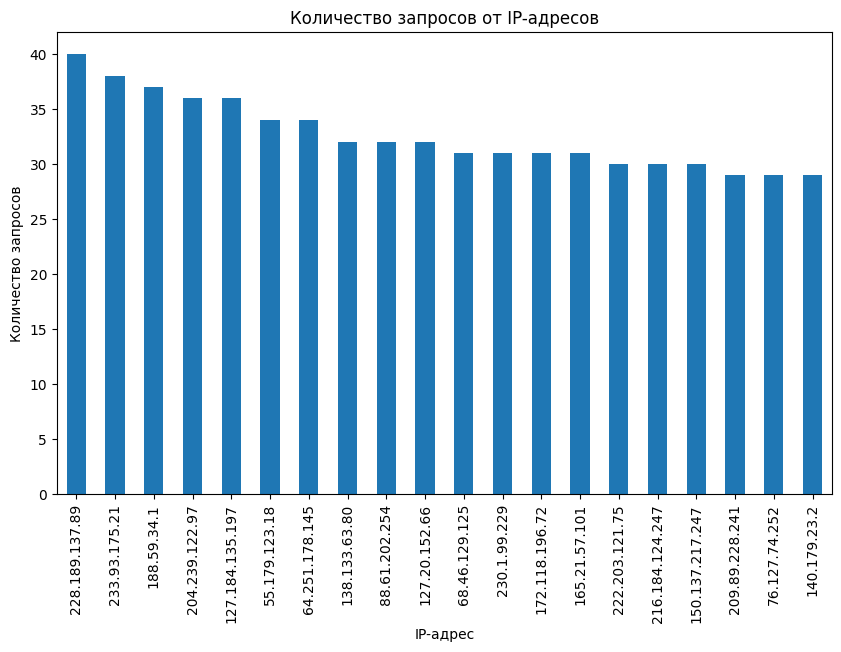

In [ ]:
plt.figure(figsize=(10, 6))
ip_counts = data['IP'].value_counts().head(20)  # Топ-20 IP
ip_counts.plot(kind='bar')
plt.title('Количество запросов от IP-адресов')
plt.xlabel('IP-адрес')
plt.ylabel('Количество запросов')
plt.show()

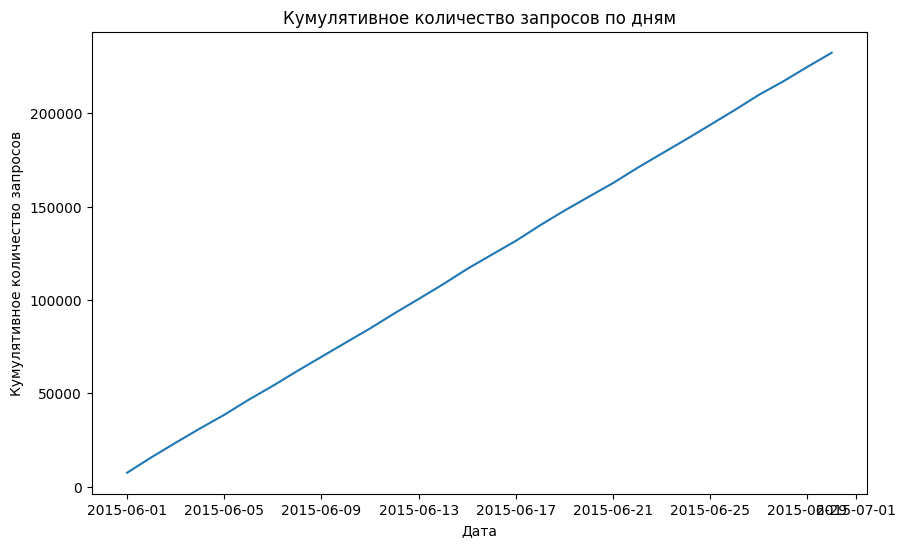

In [ ]:
cumulative_requests = requests_per_day.cumsum()
plt.figure(figsize=(10, 6))
cumulative_requests.plot(kind='line')
plt.title('Кумулятивное количество запросов по дням')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное количество запросов')
plt.show()

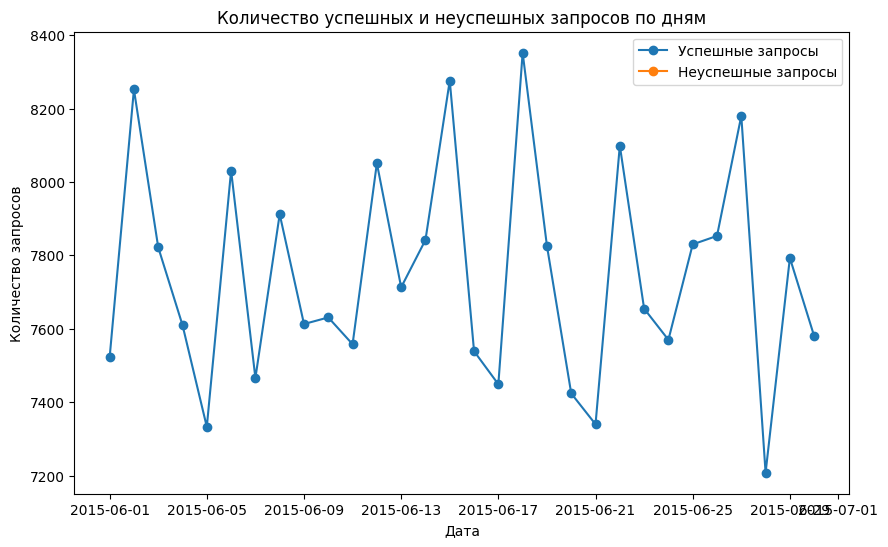

In [ ]:
plt.figure(figsize=(10, 6))
success_counts = data[data['status'] == 200].groupby('date').size()
failure_counts = data[data['status'] != 200].groupby('date').size()
plt.plot(success_counts.index, success_counts, label='Успешные запросы', marker='o')
plt.plot(failure_counts.index, failure_counts, label='Неуспешные запросы', marker='o')
plt.title('Количество успешных и неуспешных запросов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество запросов')
plt.legend()
plt.show()

<ipython-input-46-045625d9fb14>:4: UserWarning: The markers list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(x='time', y='size', hue='status', data=data, alpha=0.7, palette=palette, s=50, style='status', markers=['o', 's', 'D', 'P'])


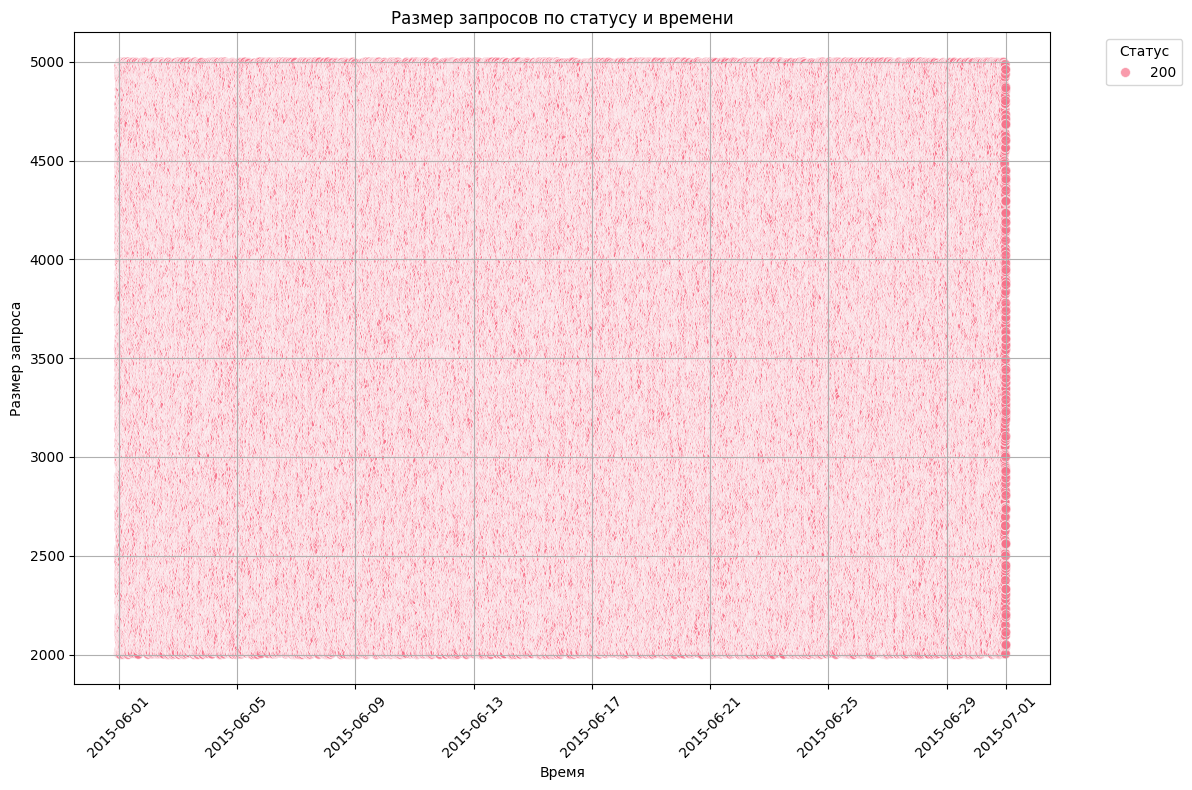

In [ ]:
palette = sns.color_palette("husl", len(data['status'].unique()))

plt.figure(figsize=(12, 8))
sns.scatterplot(x='time', y='size', hue='status', data=data, alpha=0.7, palette=palette, s=50, style='status', markers=['o', 's', 'D', 'P'])
plt.title('Размер запросов по статусу и времени')
plt.xlabel('Время')
plt.ylabel('Размер запроса')
plt.legend(title='Статус', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(data.info)

<bound method DataFrame.info of                      IP                      time  \
0        79.239.214.126 2015-06-01 00:00:07+04:00   
1       203.205.145.253 2015-06-01 00:00:24+04:00   
2        79.239.214.126 2015-06-01 00:00:31+04:00   
3        79.239.214.126 2015-06-01 00:00:34+04:00   
4        170.107.231.22 2015-06-01 00:02:54+04:00   
...                 ...                       ...   
232325     182.50.44.71 2015-06-30 23:59:36+04:00   
232326   17.134.175.104 2015-06-30 23:59:43+04:00   
232327     182.50.44.71 2015-06-30 23:59:47+04:00   
232328   29.141.180.191 2015-06-30 23:59:48+04:00   
232329    201.174.171.2 2015-06-30 23:59:52+04:00   

                                         request  status  size       ID  \
0                   POST /catalog.phtml HTTP 1.1     200  2005   ID5075   
1                    POST /search.phtml HTTP 1.1     200  3397   ID5076   
2                   POST /catalog.phtml HTTP 1.1     200  3547   ID5075   
3                    POST /sear

In [ ]:
label_encoder_ip = LabelEncoder()
data['ip_encoded'] = label_encoder_ip.fit_transform(data['IP'])

label_encoder_status = LabelEncoder()
data['status_encoded'] = label_encoder_status.fit_transform(data['status'].astype(str))

label_encoder_request = LabelEncoder()
data['request_encoded'] = label_encoder_request.fit_transform(data['request'])

In [ ]:
features = ['ip_encoded', 'hour', 'size', 'status_encoded', 'request_encoded']

X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(X)

        ip_encoded  hour  size  status_encoded  request_encoded
0            44899     0  2005               0              100
1            22528     0  3397               0              101
2            44899     0  3547               0              100
3            44899     0  3733               0              101
4            15305     0  3357               0              101
...            ...   ...   ...             ...              ...
232325       17958    23  2202               0               14
232326       15132    23  2561               0              101
232327       17958    23  2734               0              100
232328       34179    23  4186               0              100
232329       22096    23  2050               0              101

[232330 rows x 5 columns]


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['cluster'] = dbscan.fit_predict(X_scaled)

outliers = data[data['cluster'] == -1]

In [ ]:
print(f"Количество выбросов: {outliers.shape[0]}")
print(f"Выбросы: \n{outliers[['IP', 'hour', 'size', 'status', 'request']].head()}")

Количество выбросов: 4
Выбросы: 
                   IP  hour  size  status  \
15910   39.28.165.252     0  2198     200   
62217   37.202.85.135     0  2416     200   
155350   34.235.8.116     0  2282     200   
220428  97.144.211.15    10  4890     200   

                                         request  
15910   GET /addbasket.phtml?id_book=13 HTTP 1.1  
62217   GET /addbasket.phtml?id_book=11 HTTP 1.1  
155350   GET /addbasket.phtml?id_book=1 HTTP 1.1  
220428   GET /addbasket.phtml?id_book=1 HTTP 1.1  


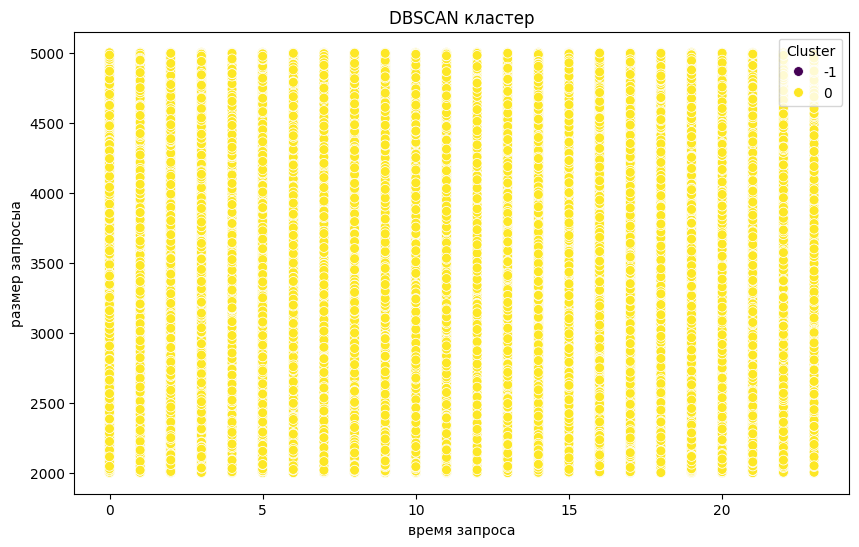

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='hour', y='size', hue='cluster', palette='viridis', s=50)
plt.title('DBSCAN кластер')
plt.xlabel('время запроса')
plt.ylabel('размер запросыа')
plt.legend(title='Cluster', loc='upper right')
plt.show()

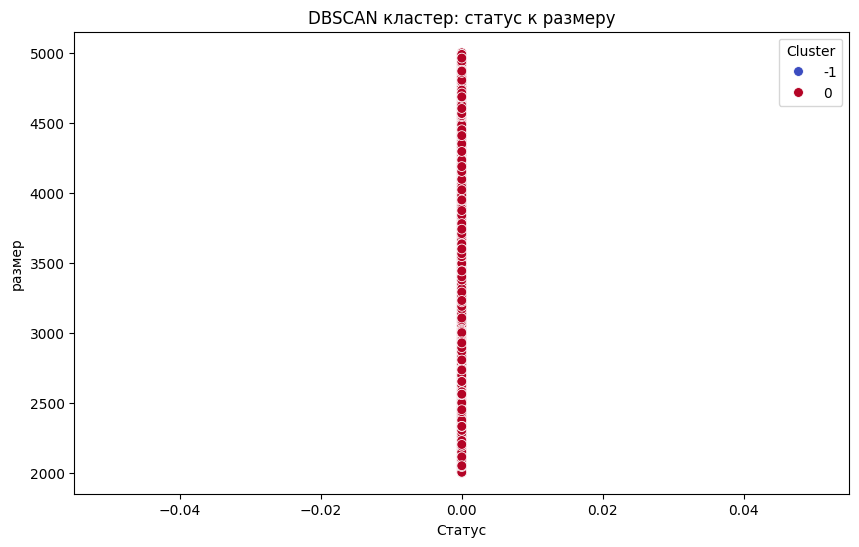

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='status_encoded', y='size', hue='cluster', palette='coolwarm', s=50)
plt.title('DBSCAN кластер: статус к размеру')
plt.xlabel('Статус')
plt.ylabel('размер')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [ ]:
normal_data = data[data['cluster'] != -1]
outliers = data[data['cluster'] == -1]

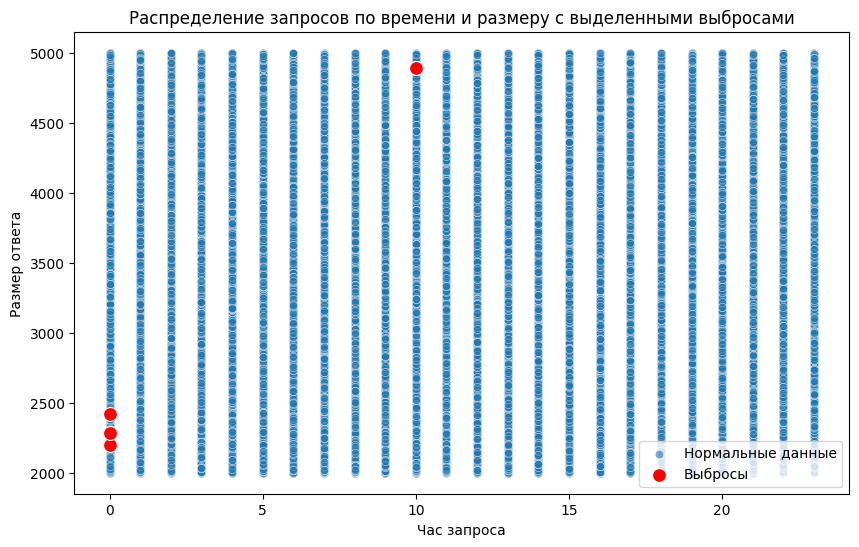

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=normal_data['hour'], y=normal_data['size'], label='Нормальные данные', alpha=0.6)
sns.scatterplot(x=outliers['hour'], y=outliers['size'], color='red', label='Выбросы', s=100)
plt.title('Распределение запросов по времени и размеру с выделенными выбросами')
plt.xlabel('Час запроса')
plt.ylabel('Размер ответа')
plt.legend()
plt.show()

In [ ]:
sns.pairplot(data=data, vars=['hour', 'size', 'status_encoded', 'request_encoded'], hue='cluster', palette='coolwarm', plot_kws={'alpha':0.6})
plt.suptitle('Графики признаков с выделенными выбросами', y=1.02)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7e195c67a0e0> (for post_execute):


KeyboardInterrupt: 

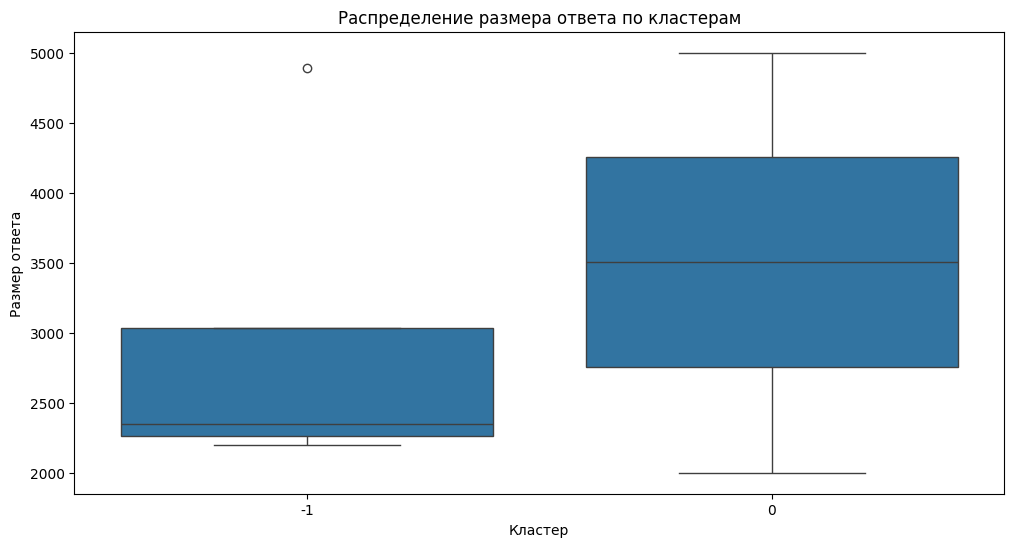

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='size', data=data, showfliers=True)
plt.title('Распределение размера ответа по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Размер ответа')
plt.show()

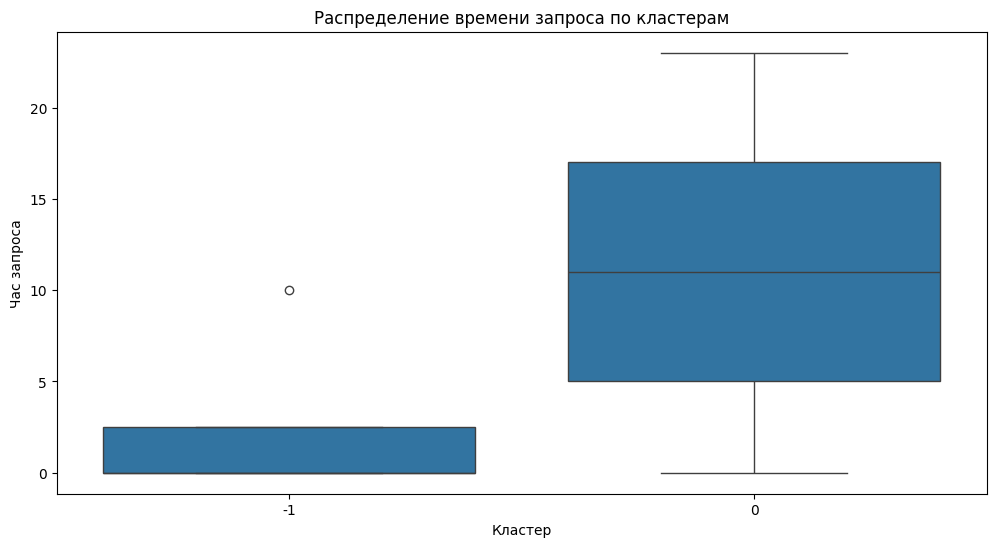

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='hour', data=data, showfliers=True)
plt.title('Распределение времени запроса по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Час запроса')
plt.show()

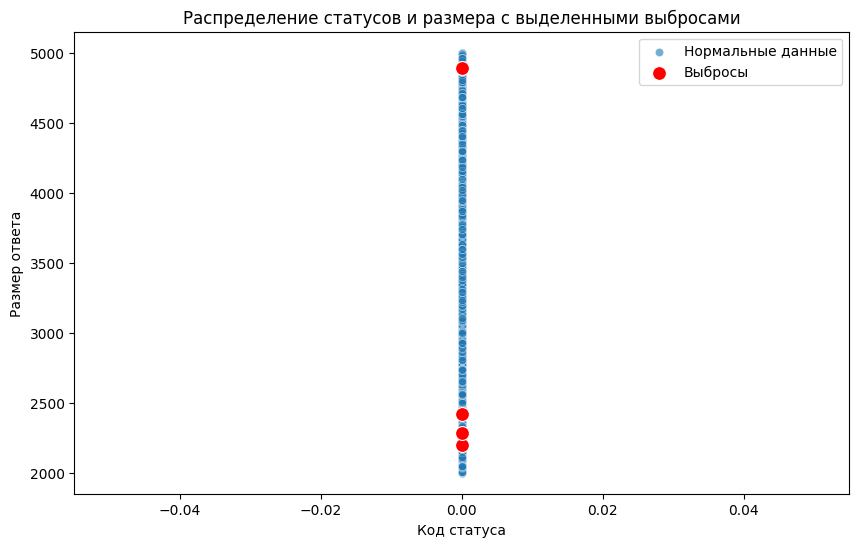

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=normal_data['status_encoded'], y=normal_data['size'], label='Нормальные данные', alpha=0.6)
sns.scatterplot(x=outliers['status_encoded'], y=outliers['size'], color='red', label='Выбросы', s=100)
plt.title('Распределение статусов и размера с выделенными выбросами')
plt.xlabel('Код статуса')
plt.ylabel('Размер ответа')
plt.legend()
plt.show()

In [ ]:
print(data.info)

<bound method DataFrame.info of                      IP                      time  \
0        79.239.214.126 2015-06-01 00:00:07+04:00   
1       203.205.145.253 2015-06-01 00:00:24+04:00   
2        79.239.214.126 2015-06-01 00:00:31+04:00   
3        79.239.214.126 2015-06-01 00:00:34+04:00   
4        170.107.231.22 2015-06-01 00:02:54+04:00   
...                 ...                       ...   
232325     182.50.44.71 2015-06-30 23:59:36+04:00   
232326   17.134.175.104 2015-06-30 23:59:43+04:00   
232327     182.50.44.71 2015-06-30 23:59:47+04:00   
232328   29.141.180.191 2015-06-30 23:59:48+04:00   
232329    201.174.171.2 2015-06-30 23:59:52+04:00   

                                         request  status  size       ID  \
0                   POST /catalog.phtml HTTP 1.1     200  2005   ID5075   
1                    POST /search.phtml HTTP 1.1     200  3397   ID5076   
2                   POST /catalog.phtml HTTP 1.1     200  3547   ID5075   
3                    POST /sear

In [ ]:
addbasket_data = data[data['request'].str.contains('/addbasket.phtml')]

In [ ]:
daily_requests = addbasket_data.groupby('date').size()

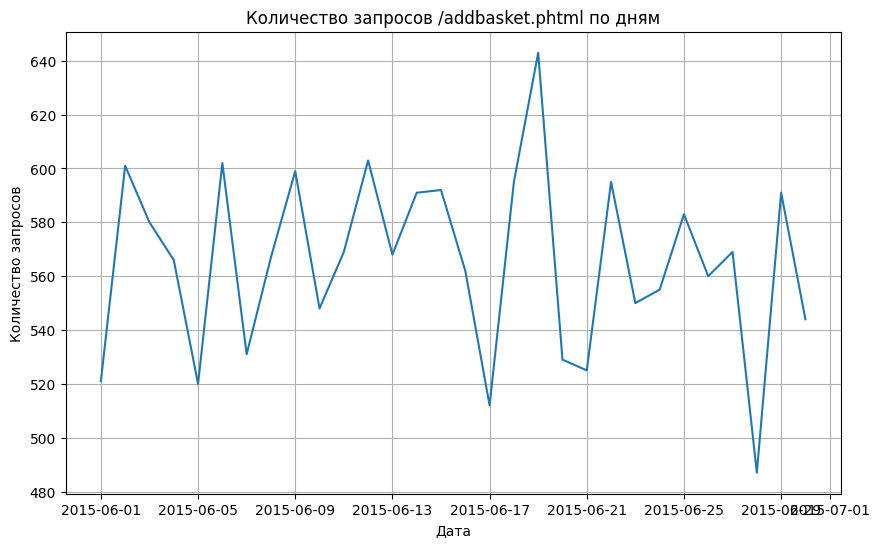

In [ ]:
plt.figure(figsize=(10, 6))
daily_requests.plot(kind='line')
plt.title('Количество запросов /addbasket.phtml по дням')
plt.xlabel('Дата')
plt.ylabel('Количество запросов')
plt.grid(True)
plt.show()

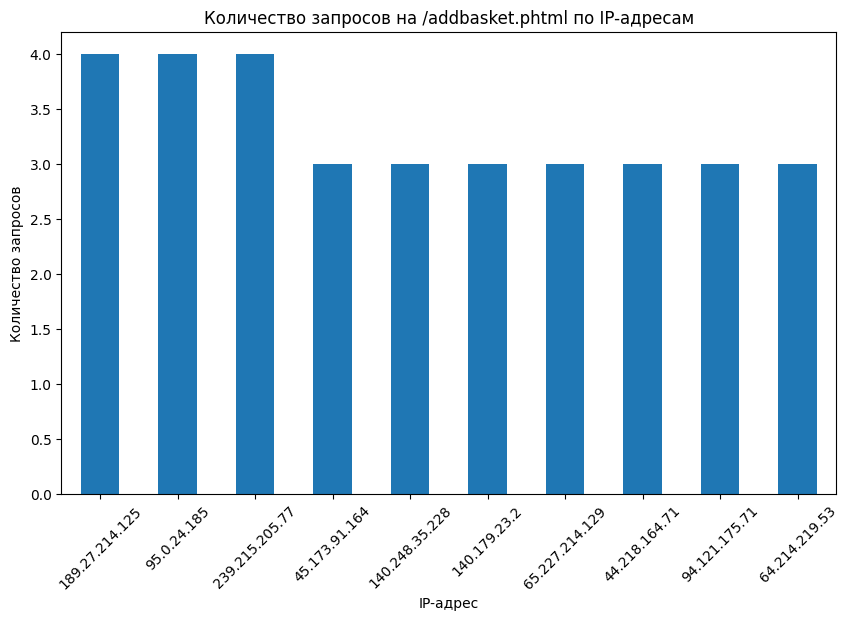

In [ ]:
ip_requests = addbasket_data.groupby('IP').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ip_requests.head(10).plot(kind='bar')
plt.title('Количество запросов на /addbasket.phtml по IP-адресам')
plt.xlabel('IP-адрес')
plt.ylabel('Количество запросов')
plt.xticks(rotation=45)
plt.show()

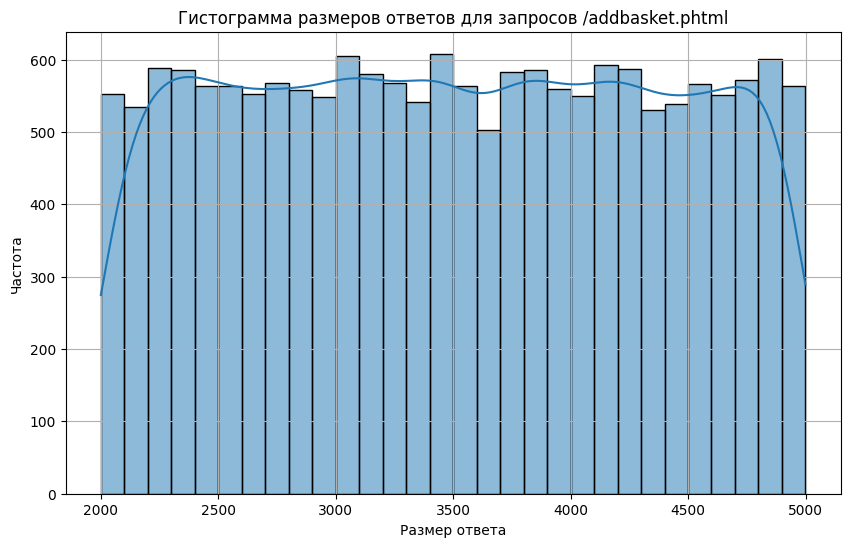

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(addbasket_data['size'], bins=30, kde=True)
plt.title('Гистограмма размеров ответов для запросов /addbasket.phtml')
plt.xlabel('Размер ответа')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

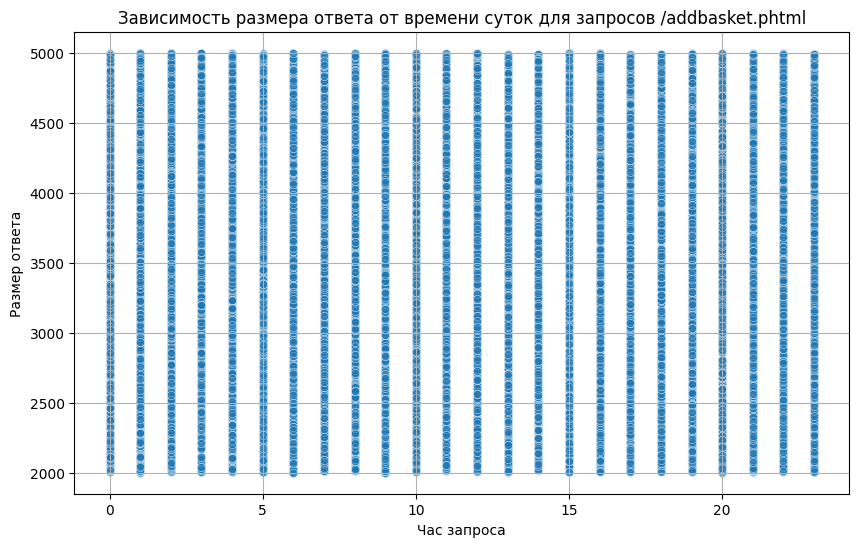

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=addbasket_data['hour'], y=addbasket_data['size'], alpha=0.6)
plt.title('Зависимость размера ответа от времени суток для запросов /addbasket.phtml')
plt.xlabel('Час запроса')
plt.ylabel('Размер ответа')
plt.grid(True)
plt.show()


<ipython-input-79-f02ec256b1b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addbasket_data['id_book'] = addbasket_data['request'].str.extract(r'id_book=(\d+)')


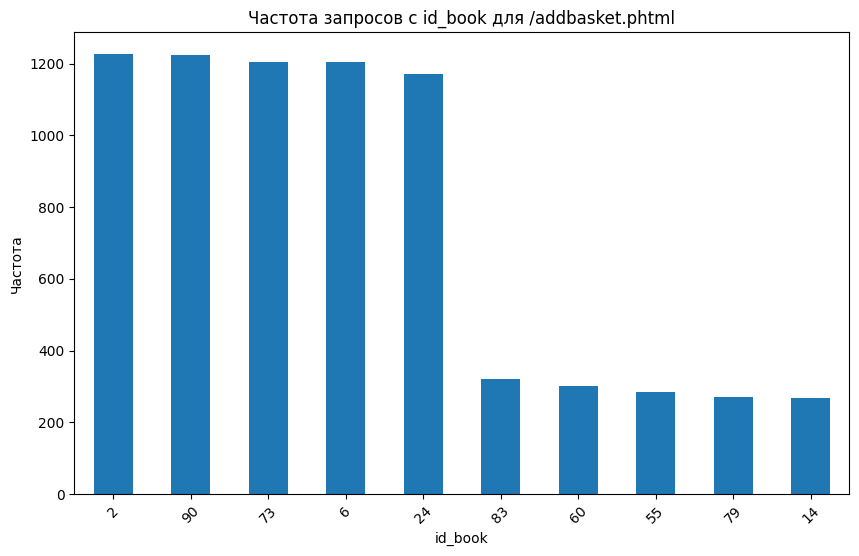

In [ ]:
addbasket_data['id_book'] = addbasket_data['request'].str.extract(r'id_book=(\d+)')

book_requests = addbasket_data['id_book'].value_counts()

plt.figure(figsize=(10, 6))
book_requests.head(10).plot(kind='bar')
plt.title('Частота запросов с id_book для /addbasket.phtml')
plt.xlabel('id_book')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()


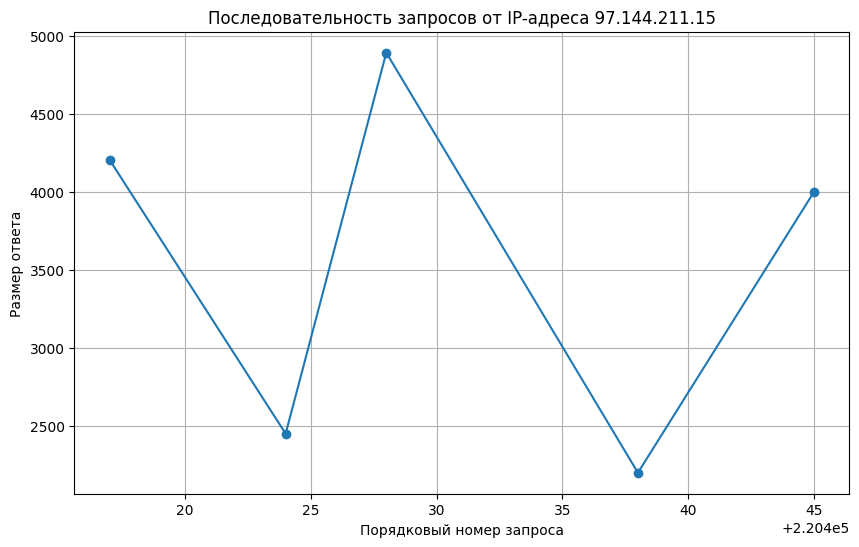

In [ ]:
specific_ip_data = data[data['IP'] == '97.144.211.15']

plt.figure(figsize=(10, 6))
specific_ip_data.sort_values('date')['size'].plot(kind='line', marker='o')
plt.title('Последовательность запросов от IP-адреса 97.144.211.15')
plt.xlabel('Порядковый номер запроса')
plt.ylabel('Размер ответа')
plt.grid(True)
plt.show()


In [ ]:
print(data.info)

<bound method DataFrame.info of                      IP                      time  \
0        79.239.214.126 2015-06-01 00:00:07+04:00   
1       203.205.145.253 2015-06-01 00:00:24+04:00   
2        79.239.214.126 2015-06-01 00:00:31+04:00   
3        79.239.214.126 2015-06-01 00:00:34+04:00   
4        170.107.231.22 2015-06-01 00:02:54+04:00   
...                 ...                       ...   
232325     182.50.44.71 2015-06-30 23:59:36+04:00   
232326   17.134.175.104 2015-06-30 23:59:43+04:00   
232327     182.50.44.71 2015-06-30 23:59:47+04:00   
232328   29.141.180.191 2015-06-30 23:59:48+04:00   
232329    201.174.171.2 2015-06-30 23:59:52+04:00   

                                         request  status  size       ID  \
0                   POST /catalog.phtml HTTP 1.1     200  2005   ID5075   
1                    POST /search.phtml HTTP 1.1     200  3397   ID5076   
2                   POST /catalog.phtml HTTP 1.1     200  3547   ID5075   
3                    POST /sear

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy['url'] = data_copy['request'].str.split(' ').str[1]

In [ ]:
url_counts = data_copy['url'].value_counts()


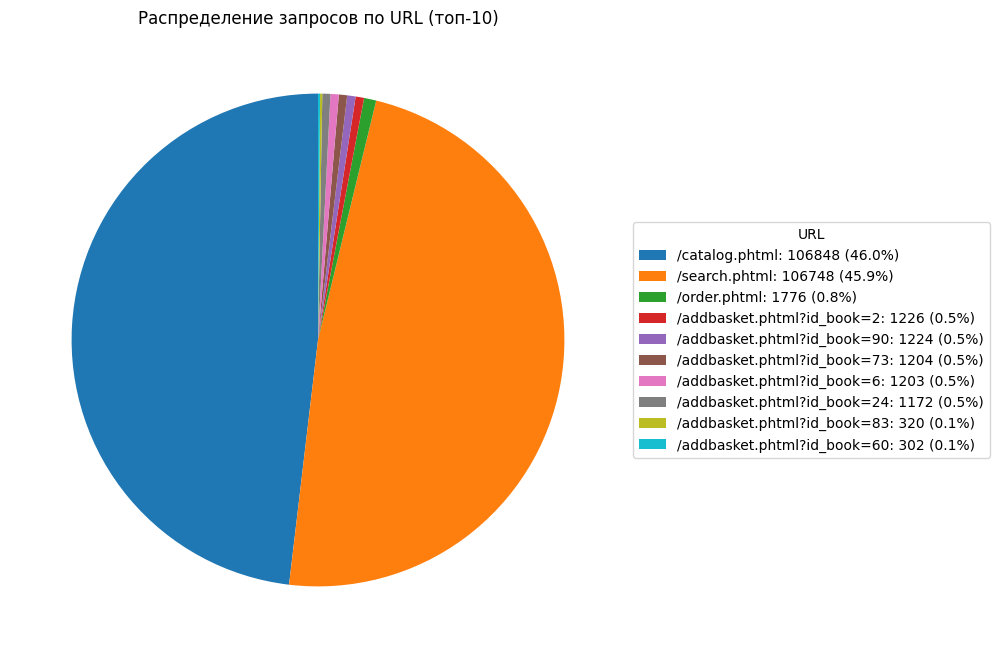

In [ ]:
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(url_counts.head(10), startangle=90)
legend_labels = [f"{url}: {count} ({(count / url_counts.sum() * 100):.1f}%)"
                 for url, count in zip(url_counts.head(10).index, url_counts.head(10).values)]
plt.legend(wedges, legend_labels, title="URL", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Распределение запросов по URL (топ-10)')
plt.show()

In [ ]:
print(data.head)

<bound method NDFrame.head of                      IP                      time  \
0        79.239.214.126 2015-06-01 00:00:07+04:00   
1       203.205.145.253 2015-06-01 00:00:24+04:00   
2        79.239.214.126 2015-06-01 00:00:31+04:00   
3        79.239.214.126 2015-06-01 00:00:34+04:00   
4        170.107.231.22 2015-06-01 00:02:54+04:00   
...                 ...                       ...   
232325     182.50.44.71 2015-06-30 23:59:36+04:00   
232326   17.134.175.104 2015-06-30 23:59:43+04:00   
232327     182.50.44.71 2015-06-30 23:59:47+04:00   
232328   29.141.180.191 2015-06-30 23:59:48+04:00   
232329    201.174.171.2 2015-06-30 23:59:52+04:00   

                                         request  status  size       ID  \
0                   POST /catalog.phtml HTTP 1.1     200  2005   ID5075   
1                    POST /search.phtml HTTP 1.1     200  3397   ID5076   
2                   POST /catalog.phtml HTTP 1.1     200  3547   ID5075   
3                    POST /search

In [ ]:
df = data.copy()

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['time'].dt.hour

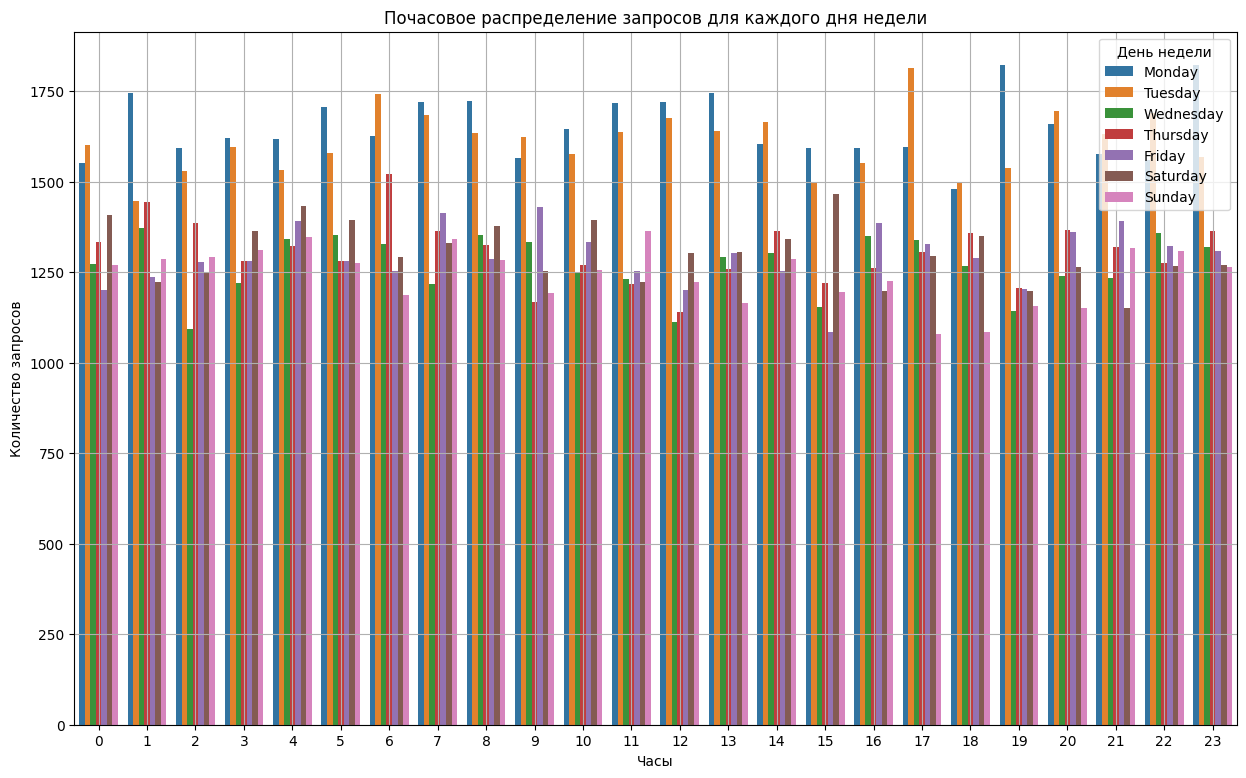

In [ ]:
plt.figure(figsize=(15, 9))
sns.countplot(data=df, x='hour', hue='day_of_week', palette='tab10')
plt.title('Почасовое распределение запросов для каждого дня недели')
plt.xlabel('Часы')
plt.ylabel('Количество запросов')
plt.legend(title='День недели')
plt.grid(True)
plt.show()

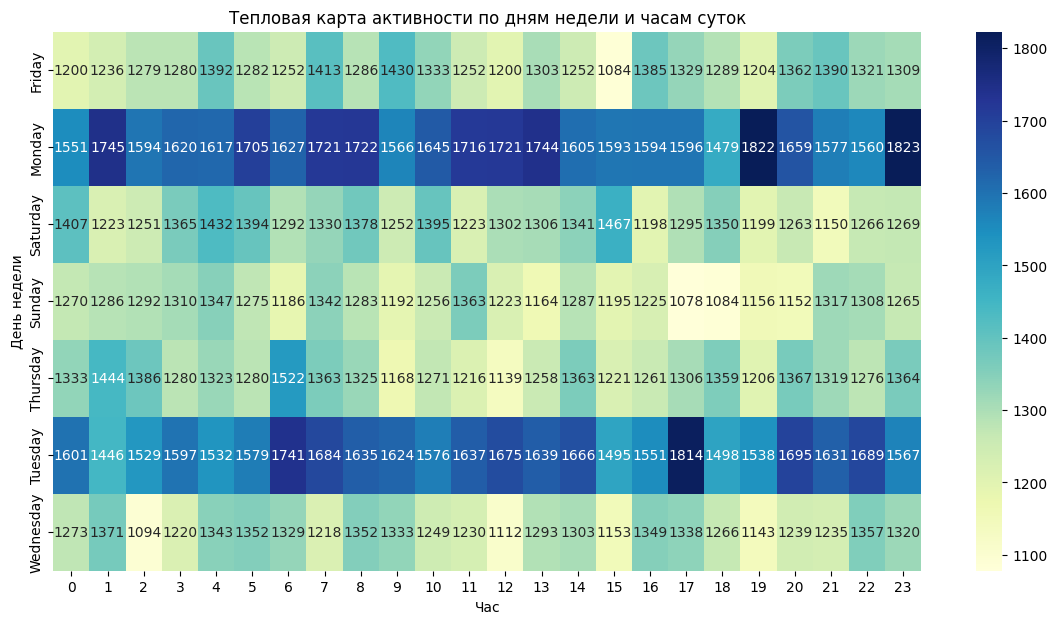

In [ ]:
heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='ID', aggfunc='count')
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Тепловая карта активности по дням недели и часам суток')
plt.xlabel('Час')
plt.ylabel('День недели')
plt.show()

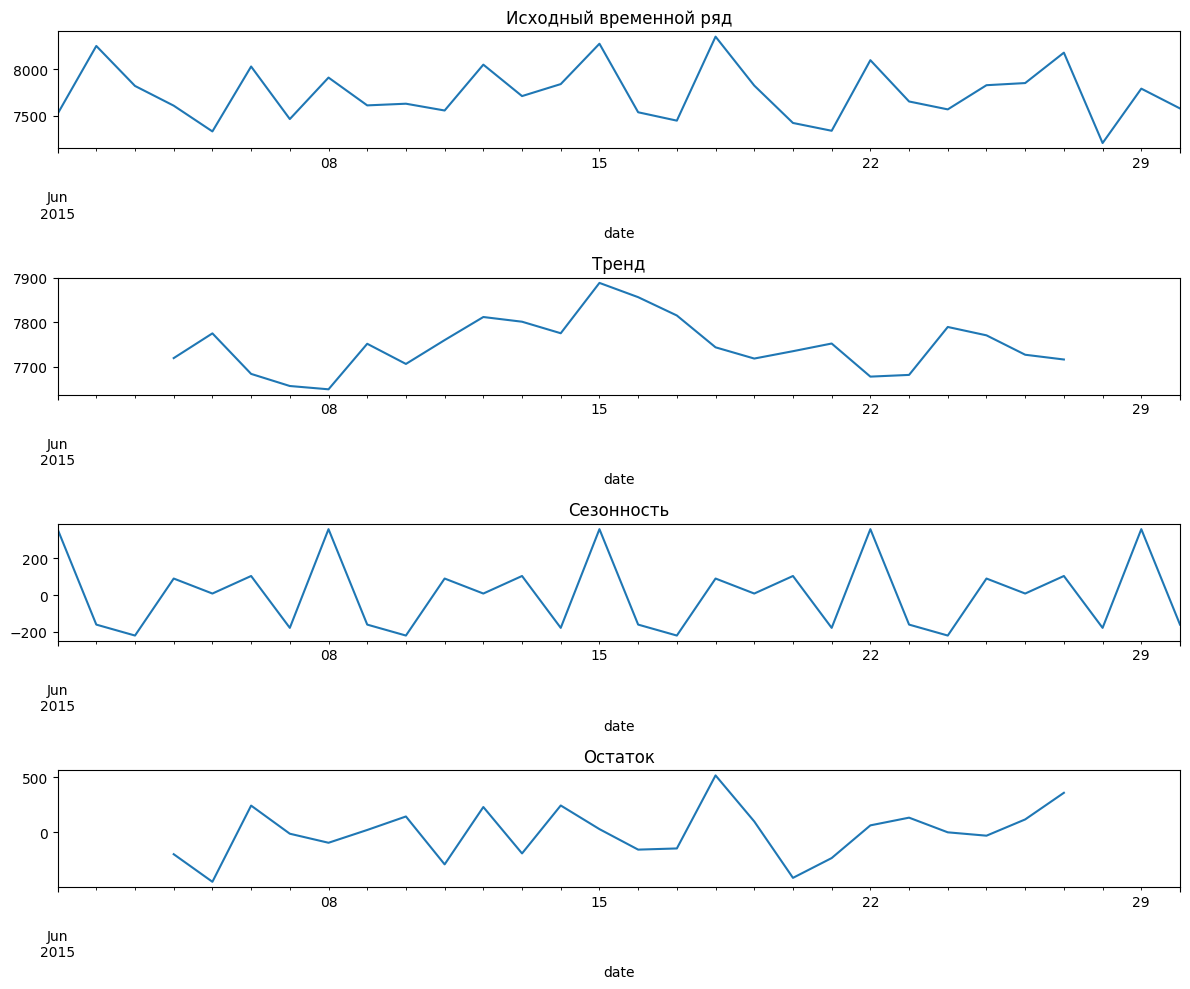

In [ ]:
time_series = df.set_index('date').resample('D').size()
decomposition = seasonal_decompose(time_series, model='additive')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1, legend=False, title='Исходный временной ряд')
decomposition.trend.plot(ax=ax2, legend=False, title='Тренд')
decomposition.seasonal.plot(ax=ax3, legend=False, title='Сезонность')
decomposition.resid.plot(ax=ax4, legend=False, title='Остаток')
plt.tight_layout()
plt.show()

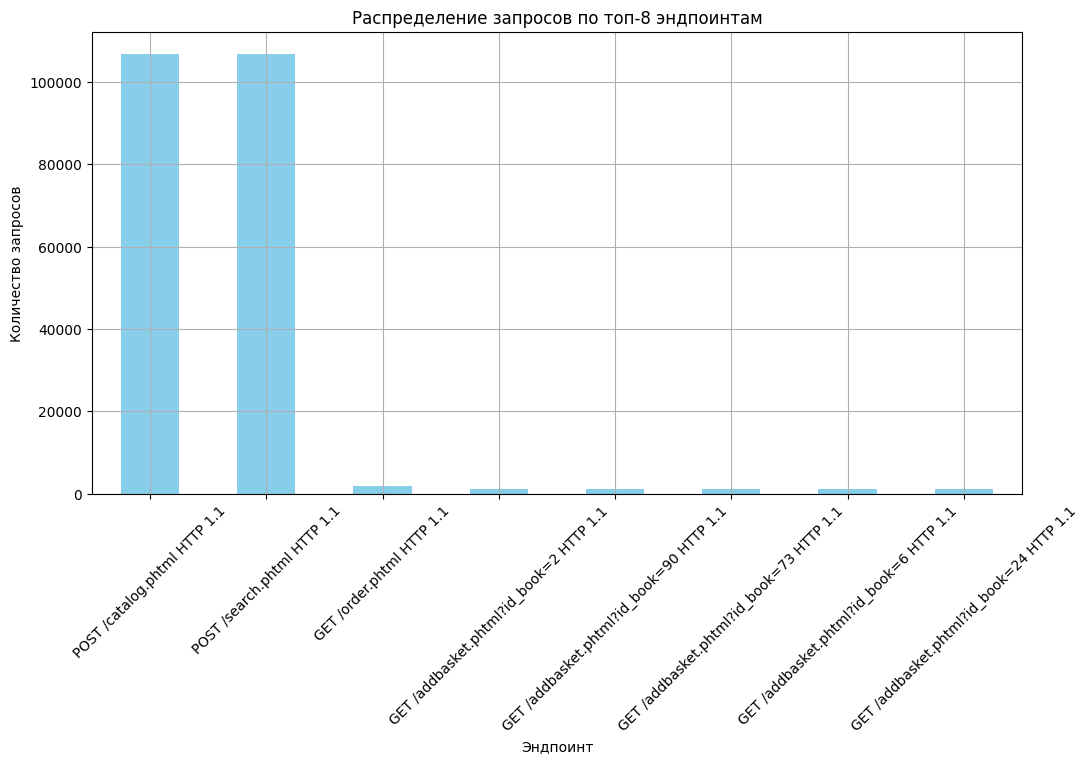

In [ ]:
endpoint_distribution = df['request'].value_counts().head(8)
plt.figure(figsize=(12, 6))
endpoint_distribution.plot(kind='bar', color='skyblue')
plt.title('Распределение запросов по топ-8 эндпоинтам')
plt.xlabel('Эндпоинт')
plt.ylabel('Количество запросов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-36-939b1c1597c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_endpoints['date'] = pd.to_datetime(df_top_endpoints['date'])


<Figure size 1200x600 with 0 Axes>

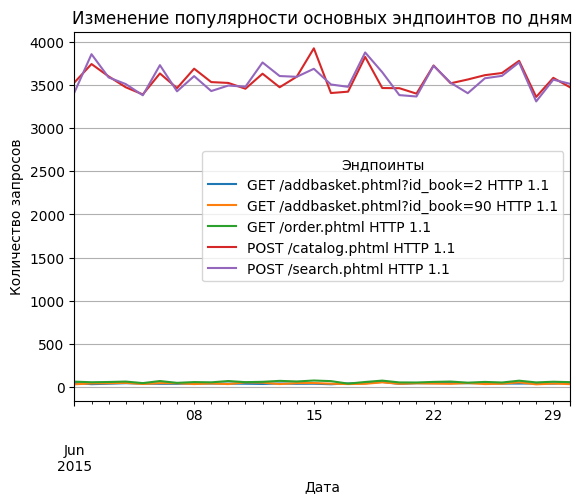

In [ ]:
top_endpoints = df['request'].value_counts().index[:5]
df_top_endpoints = df[df['request'].isin(top_endpoints)]
df_top_endpoints['date'] = pd.to_datetime(df_top_endpoints['date'])
daily_counts = df_top_endpoints.groupby(['date', 'request']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Изменение популярности основных эндпоинтов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество запросов')
plt.legend(title='Эндпоинты')
plt.grid(True)
plt.show()

In [ ]:
print(df.info)

<bound method DataFrame.info of                      IP                      time  \
0        79.239.214.126 2015-06-01 00:00:07+04:00   
1       203.205.145.253 2015-06-01 00:00:24+04:00   
2        79.239.214.126 2015-06-01 00:00:31+04:00   
3        79.239.214.126 2015-06-01 00:00:34+04:00   
4        170.107.231.22 2015-06-01 00:02:54+04:00   
...                 ...                       ...   
232325     182.50.44.71 2015-06-30 23:59:36+04:00   
232326   17.134.175.104 2015-06-30 23:59:43+04:00   
232327     182.50.44.71 2015-06-30 23:59:47+04:00   
232328   29.141.180.191 2015-06-30 23:59:48+04:00   
232329    201.174.171.2 2015-06-30 23:59:52+04:00   

                                         request  status  size       ID  \
0                   POST /catalog.phtml HTTP 1.1     200  2005   ID5075   
1                    POST /search.phtml HTTP 1.1     200  3397   ID5076   
2                   POST /catalog.phtml HTTP 1.1     200  3547   ID5075   
3                    POST /sear

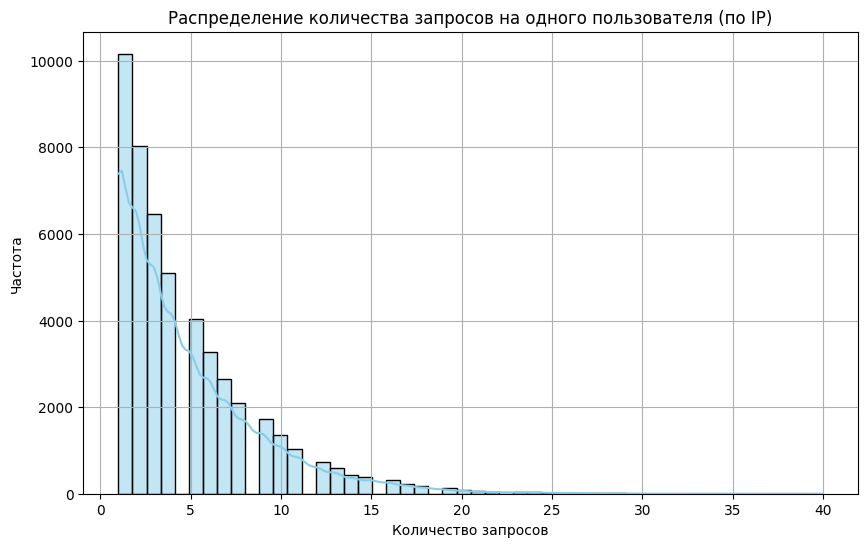

In [ ]:
user_request_count = df.groupby('IP').size()
plt.figure(figsize=(10, 6))
sns.histplot(user_request_count, bins=50, kde=True, color='skyblue')
plt.title('Распределение количества запросов на одного пользователя (по IP)')
plt.xlabel('Количество запросов')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

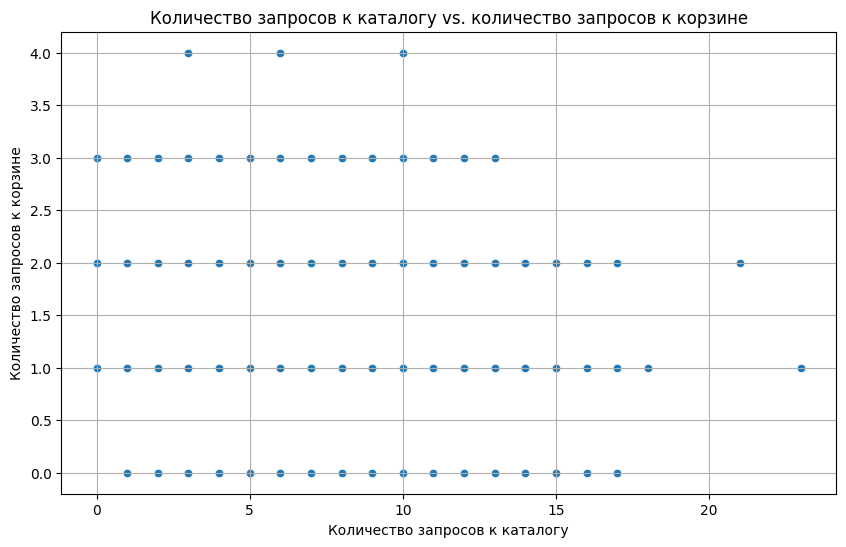

In [ ]:
catalog_requests = df[df['request'].str.contains('catalog')].groupby('IP').size()
basket_requests = df[df['request'].str.contains('addbasket')].groupby('IP').size()
scatter_df = pd.DataFrame({'catalog_requests': catalog_requests, 'basket_requests': basket_requests}).fillna(0)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='catalog_requests', y='basket_requests', data=scatter_df)
plt.title('Количество запросов к каталогу vs. количество запросов к корзине')
plt.xlabel('Количество запросов к каталогу')
plt.ylabel('Количество запросов к корзине')
plt.grid(True)
plt.show()